In [1]:
import numpy as np

In [19]:
path = "data/r 2022-07-12 13:42:07.041613.csv"
headers = np.loadtxt(path, delimiter=",", dtype="str", max_rows=1)
data = np.loadtxt(path, delimiter=",", skiprows=1)
data = np.delete(data, 3, 1)

In [20]:
headers

array(['trial', 'line_length', 'line_angle', 'stim_radius', 'stim_period',
       'rating'], dtype='<U11')

In [21]:
data.shape

(108, 6)

In [22]:
block1 = data[:30]
block2 = data[30:60]
block3 = data[60:-30]
block4 = data[-30:]
block1 = np.reshape(block1, (3, 10, -1))
block2 = np.reshape(block2, (3, 10, -1))
block3 = np.reshape(block3, (3, 6, -1))
block4 = np.reshape(block4, (3, 10, -1))

for i in range(3):
    block1[i] = block1[i][block1[i][:,1].argsort()]
    block2[i] = block2[i][block2[i][:,2].argsort()]
    block3[i] = block3[i][block3[i][:,3].argsort()]
    block4[i] = block4[i][block4[i][:,4].argsort()]

In [25]:
ratings1 = (block1[0,:,-1] + block1[1,:,-1] + block1[2,:,-1]) / 3
ratings2 = (block2[0,:,-1] + block2[1,:,-1] + block2[2,:,-1]) / 3
ratings3 = (block3[0,:,-1] + block3[1,:,-1] + block3[2,:,-1]) / 3
ratings4 = (block4[0,:,-1] + block4[1,:,-1] + block4[2,:,-1]) / 3

In [27]:
keys1 = block1[0,:,1]
keys2 = block2[0,:,2]
keys3 = block3[0,:,3]
keys4 = block4[0,:,4]

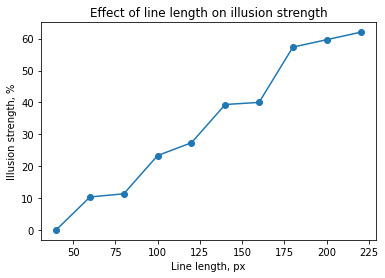

In [28]:
import matplotlib.pyplot as plt
ax = plt.subplot()
plt.scatter(keys1, ratings1)
plt.plot(keys1, ratings1)
ax.set_title("Effect of line length on illusion strength")
ax.set_xlabel("Line length, px")
ax.set_ylabel("Illusion strength, %")
plt.show()

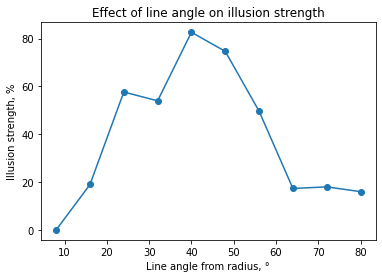

In [29]:
ax = plt.subplot()
plt.scatter(keys2, ratings2)
plt.plot(keys2, ratings2)
ax.set_title("Effect of line angle on illusion strength")
ax.set_xlabel("Line angle from radius, °")
ax.set_ylabel("Illusion strength, %")
plt.show()

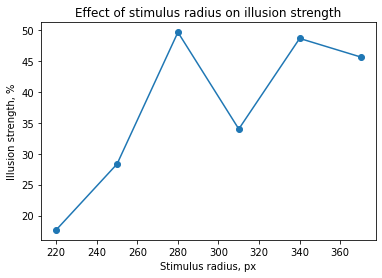

In [30]:
ax = plt.subplot()
plt.scatter(keys3, ratings3)
plt.plot(keys3, ratings3)
ax.set_title("Effect of stimulus radius on illusion strength")
ax.set_xlabel("Stimulus radius, px")
ax.set_ylabel("Illusion strength, %")
plt.show()

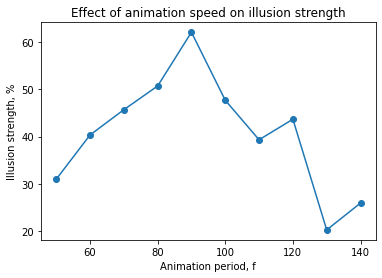

In [31]:
ax = plt.subplot()
plt.scatter(keys4, ratings4)
plt.plot(keys4, ratings4)
ax.set_title("Effect of animation speed on illusion strength")
ax.set_xlabel("Animation period, f")
ax.set_ylabel("Illusion strength, %")
plt.show()